In [1]:
import re
import numpy as np
import math
import tensorflow as tf

from matplotlib import pyplot as plt
%matplotlib inline
import sklearn.datasets
from sklearn import preprocessing, model_selection

# Data

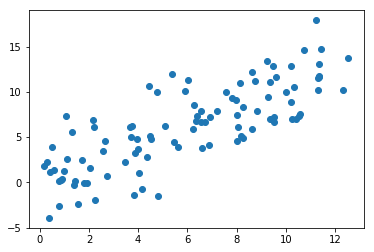

In [2]:
n = 100
X = np.random.uniform(0,4*np.pi, size=(n,1))
y = X + np.random.normal(0,3,size=(n,1))

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.9, random_state=42)

x_val = np.random.uniform(0,4*np.pi, size=(n,1))
y_val = X + np.random.normal(0,3,size=(n,1))

plt.scatter(X, y)

# Optimal Encoding

In [3]:
from networks import MLP
from OptimalEncoding import OptimalEncoding

Instructions for updating:
Use the retry module or similar alternatives.


## Regression

In [4]:
n_in = X.shape[-1]
k = 200
n_out = X.shape[-1]

widths = [3000, 3000, 3000]


In [5]:
encoder = MLP(n_in, k, widths)
decoder = MLP(k, n_out, widths)

In [6]:
oe = OptimalEncoding(encoder, decoder, k, activation = None)

100%|██████████| 10000/10000 [02:51<00:00, 58.15it/s]


Final task loss: -0.180709


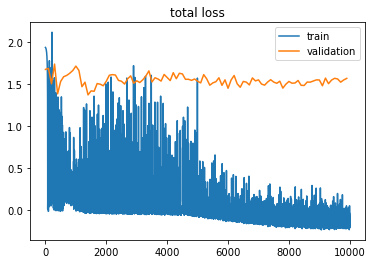

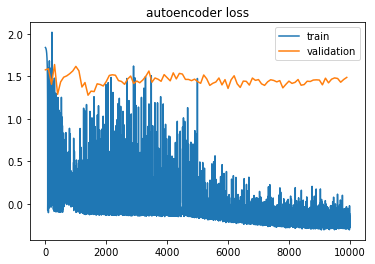

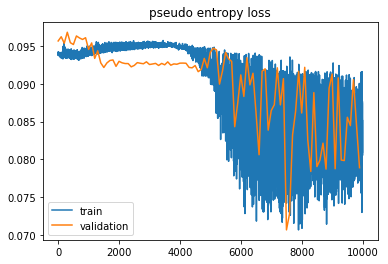

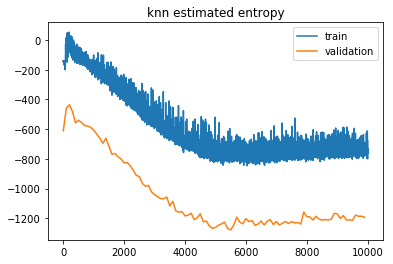

In [7]:
oe.train(X_train,x_val=x_val,y_val=y_val, y=y_train, min_entropy=True, epochs=10000, batch_size=10, lr=1e-4, sigma = .01, task = 'autoencoder', heteroskedastic=False, n_samples=10)

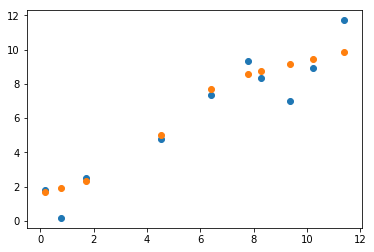

In [8]:
zhat = oe.encode(X_train)
yhat = oe.decode(zhat)
plt.scatter(X_train, y_train)
plt.scatter(X_train, yhat)

(array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  2.]),
 array([-0.00450038, -0.003981  , -0.00346161, -0.00294222, -0.00242283,
        -0.00190344, -0.00138405, -0.00086467, -0.00034528,  0.00017411,
         0.0006935 ]),
 <a list of 10 Patch objects>)

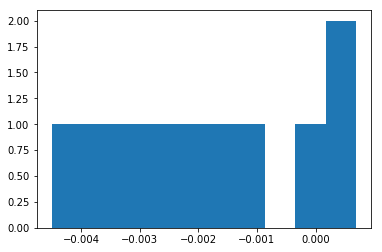

In [9]:
plt.hist(zhat[:,0])

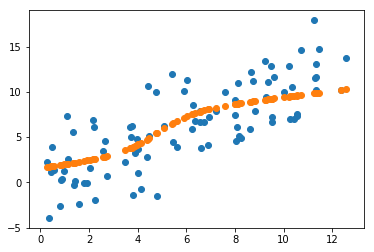

In [10]:
zhat = oe.encode(X_test)
yhat = oe.decode(zhat)
plt.scatter(X_test, y_test)
plt.scatter(X_test, yhat)

# SubOptimal Encoding

## Regression

In [11]:
n_in = X.shape[-1]
k = 200
n_out = X.shape[-1]

widths = [3000, 3000, 3000]


In [12]:
encoder = MLP(n_in, k, widths)
decoder = MLP(k, n_out, widths)

In [13]:
oe = OptimalEncoding(encoder, decoder, k, activation = None)

100%|██████████| 10000/10000 [02:09<00:00, 77.36it/s]


Final task loss: -0.088375


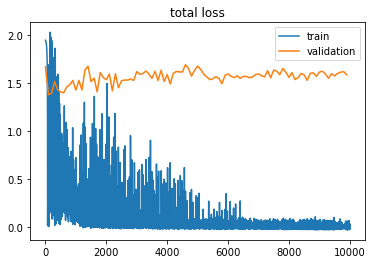

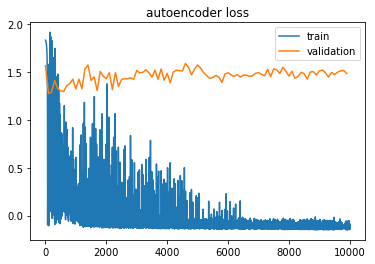

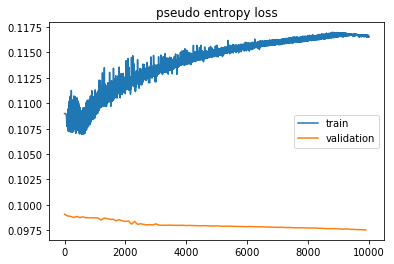

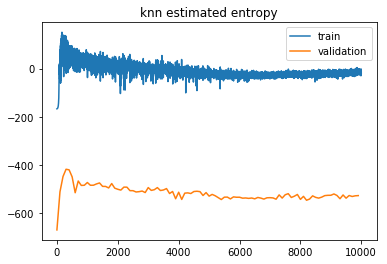

In [14]:
oe.train(X_train,x_val=x_val,y_val=y_val, y=y_train, min_entropy=False, epochs=10000, batch_size=10, lr=1e-4, sigma = 0, task = 'autoencoder', heteroskedastic=False)

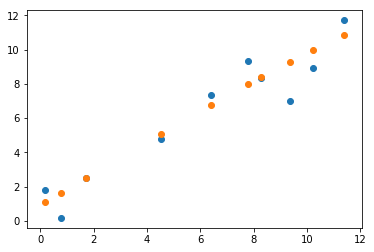

In [15]:
zhat = oe.encode(X_train)
yhat = oe.decode(zhat)
plt.scatter(X_train, y_train)
plt.scatter(X_train, yhat)

(array([ 2.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  2.]),
 array([-0.01646399, -0.01369093, -0.01091787, -0.0081448 , -0.00537174,
        -0.00259868,  0.00017439,  0.00294745,  0.00572051,  0.00849358,
         0.01126664]),
 <a list of 10 Patch objects>)

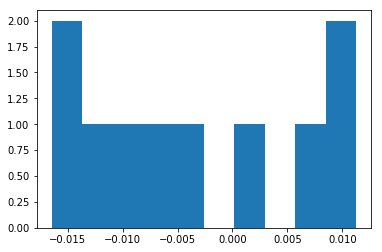

In [16]:
plt.hist(zhat[:,0])

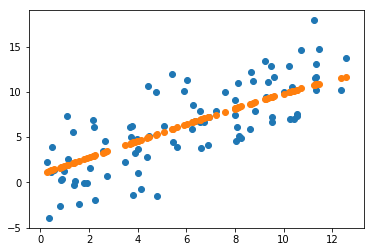

In [17]:
zhat = oe.encode(X_test)
yhat = oe.decode(zhat)
plt.scatter(X_test, y_test)
plt.scatter(X_test, yhat)